# Your first convolutional neural network

# imports

In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D,BatchNormalization, LeakyReLU,ReLU, Dropout, Activation , concatenate , Add
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K

from keras.datasets import cifar10

# data

In [2]:
NUM_CLASSES = 10


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1]

0.36862746

In [6]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# New layer
x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

# New layer
x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                            

# train

In [8]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [9]:
history = model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 30s 9ms/step - loss: 1.5118 - accuracy: 0.4672 - val_loss: 1.3951 - val_accuracy: 0.5319
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0689 - accuracy: 0.6240 - val_loss: 0.9384 - val_accuracy: 0.6712
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9241 - accuracy: 0.6744 - val_loss: 0.8592 - val_accuracy: 0.7053
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8365 - accuracy: 0.7046 - val_loss: 0.8357 - val_accuracy: 0.7100
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7774 - accuracy: 0.7287 - val_loss: 0.8037 - val_accuracy: 0.7190
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7267 - accuracy: 0.7451 - val_loss: 0.7824 - val_accuracy: 0.7255
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6853 - accuracy: 0.7595 - val_loss: 0.6980 - val_ac

In [10]:
model.layers[6].get_weights()

[]

# analysis

In [11]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 36ms/step - loss: 0.6914 - accuracy: 0.7681


[0.6914401650428772, 0.7681000232696533]

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 3ms/step


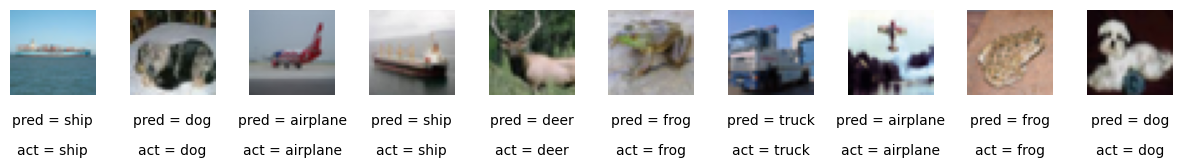

In [13]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


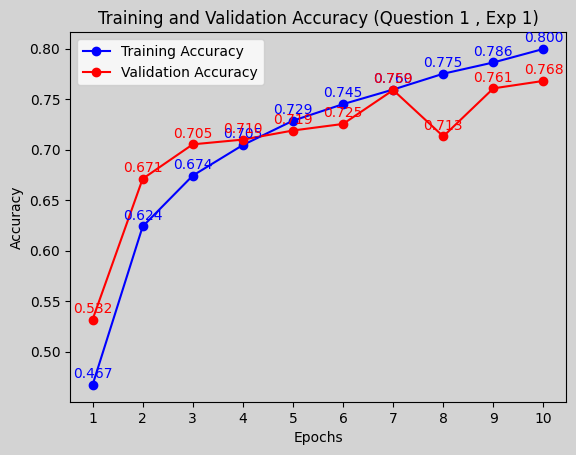

In [14]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, ax = plt.subplots()
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Training Accuracy',color='blue',marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy',color='red',marker='o')

for i, txt in enumerate(train_accuracy):
    plt.annotate(f'{txt:.3f}', (epochs[i], train_accuracy[i]), textcoords="offset points", xytext=(0, 5), ha='center', color='blue')

for i, txt in enumerate(val_accuracy):
    plt.annotate(f'{txt:.3f}', (epochs[i], val_accuracy[i]), textcoords="offset points", xytext=(0, 5), ha='center', color='red')


plt.title('Training and Validation Accuracy (Question 1 , Exp 1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()
plt.show()

In [15]:
import csv

csv_file_path = 'Q1.csv'

with open(csv_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    rows = list(reader)

header = rows[0]
new_column = ['Ex1_trainacc','Ex1_valacc']

for column in new_column:
    if column not in header:
        header.append(column)

rows[0] = header

for row, t_acc, v_acc in zip(rows[1:], train_accuracy,val_accuracy ):
    row.extend([t_acc, v_acc])

with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

print(f"Accuracy values have been appended to new rows in {csv_file_path}")

Accuracy values have been appended to new rows in Q1.csv
